In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [2]:
accuracy_list = []
torch.cuda.set_device(0)

In [3]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/autopsy/cross')

batch_size=32
drop_mult=0.1
learning_rate=1e-4

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [4]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])


#learn = language_model_learner(data_lm, drop_mult=drop_mult, pretrained_model=URLs.WT103)

learn = language_model_learner(data_lm, drop_mult=0.5, clip=0.12)

In [5]:
pth = '/home/ubuntu/ResearchMilestone/pre-trained-models/awd/3-layer/models/awd_3.pth'
it = '/home/ubuntu/ResearchMilestone/pre-trained-models/awd/3-layer/tmp/itos.pkl'

#load weights
learn.load_pretrained(pth,it)

In [6]:

learn.freeze()
#learn.fit(4, slice(1e-4,1e-2))
learn.fit_one_cycle(4,5e-3, moms=(0.8,0.7))

learn.unfreeze()
#learn.fit(12, slice(1e-4,1e-2))
learn.fit_one_cycle(12,5e-3, moms=(0.8,0.7))

learn.save_encoder('testing')





epoch,train_loss,valid_loss,accuracy
1,2.632907,2.166074,0.534224
2,2.047102,1.871346,0.577110
3,1.937395,1.792627,0.589866
4,1.892642,1.778184,0.592164


epoch,train_loss,valid_loss,accuracy
1,1.703530,1.627414,0.617139
2,1.552042,1.533049,0.635600
3,1.463833,1.470569,0.649172
4,1.360435,1.429383,0.656554
5,1.266245,1.398004,0.663968
6,1.178823,1.385602,0.669187
7,1.073813,1.380471,0.672010
8,0.959239,1.382695,0.672999
9,0.878248,1.395628,0.675332
10,0.814882,1.413211,0.675676


In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('testing')

learn.freeze()




In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


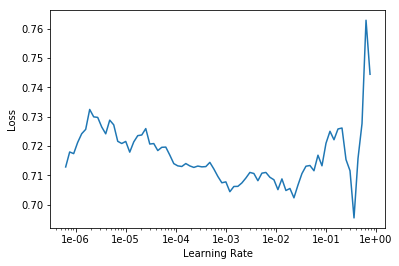

In [9]:
learn.recorder.plot()

In [10]:
#learn.fit(4,learning_rate, wd=wd)
learn.fit_one_cycle(4,5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.596051,0.556762,0.706076
2,0.574172,0.656140,0.638752
3,0.560071,0.938329,0.495895
4,0.564247,0.642860,0.686371


In [11]:
learn.unfreeze()
#learn.fit(epochs,learning_rate)
learn.fit_one_cycle(20,5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.568219,0.501465,0.788177
2,0.529878,0.416320,0.832512
3,0.501972,0.403581,0.850575
4,0.511090,0.462942,0.804598
5,0.507526,0.365490,0.845649
6,0.563176,0.303271,0.871921
7,0.457576,0.329190,0.876847
8,0.460731,0.261591,0.903120
9,0.436222,0.291781,0.914614
10,0.413737,0.296870,0.885057


In [12]:
learn.validate()

[0.21104835, tensor(0.9294)]

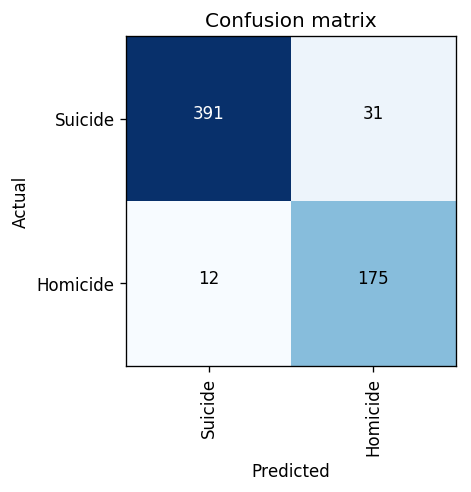

In [13]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

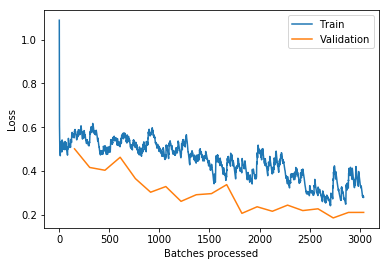

In [14]:
learn.recorder.plot_losses()

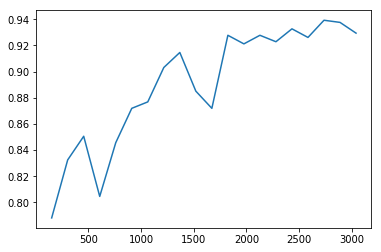

In [15]:
learn.recorder.plot_metrics()